<a href="https://colab.research.google.com/github/Nagalakshmi136/loan_prediction/blob/main/Copy_of_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connecting to google drive:

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Importing required packages:

In [3]:
import pandas as pd
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
    classification_report,
    confusion_matrix,
)
import seaborn as sns
from sklearn.utils.multiclass import unique_labels


Data Preparation:

In [4]:
def load_data(data_path: str) -> pd.DataFrame:
    """
    Loads the data from given csv file path
    Params:
      data_path (str): data file path
    Returns:
      data_df (pd.DataFrame): DataFrame contains the data from file
    """

    data_df = pd.read_csv(data_path)

    return data_df

In [5]:
df = pd.read_csv('/content/drive/MyDrive/dataset/loan_approval_dataset.csv')


Raw Data:

In [6]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Preprocessing the Data:

In [7]:
def min_max_norm(train_data: np.ndarray) -> np.ndarray:
    """
    calculate min_max normalization of a numpy array
    Params:
      train_data(np.ndarray): numpy array to calculate minmax normalization
    Returns:
      normalized_data(np.ndarray): minmax normalized numpy array
    """

    x_min = np.min(train_data)
    x_max = np.max(train_data)
    normalized_data = (train_data - x_min) / (x_max - x_min)
    return normalized_data


def normalize_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    perform the minmax normalization on dataframe(should contain the numerical features)
    Params:
      df(pd.DataFrame):DataFrame to normalize
    Returns:
      df(pd.Dataframe):Normalized DataFrame
    """

    cols = df.columns
    for col in cols:
        df[col] = min_max_norm(df[col].to_numpy().reshape(-1, 1))

    return df


def split_data(
    x: pd.DataFrame, y: pd.DataFrame
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, random_state=0, stratify=y
    )

    return x_train, x_test, y_train, y_test


def preprocess_data(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Performs the data preprocessing steps
    Params:
      Params(pd.DataFrame): pandas DataFrame to perform Preprocessing
    Returns:
      x_data(pd.DataFrame): Independent features DataFrame after performing preprocessing
      y_data(pd.DataFrame): Dependent feature DataFrame
    """

    # drop rows with null values
    df = df.dropna()

    # droping loan_id columns because they do not adding any meaning
    df.drop(columns=["loan_id"], inplace=True)

    # Extracting numerical columns for normalization
    numerical_col = df._get_numeric_data().columns.tolist()

    # Mapping target feature from classes `Approved` and `Rejected` to 1 and 0
    df[" loan_status"] = (df[' loan_status'] == " Approved").astype("int")

    # converting categorial features into numerical features using onehot encoding
    df = pd.get_dummies(df)
    numerical_df = df[numerical_col]

    # Normalizing numerical columns
    normalized_numerical = normalize_data(numerical_df)
    dataset = df.drop(columns=numerical_col)

    # Combining numerical features df and one hot encoded df
    final_df = pd.concat([normalized_numerical, dataset], axis=1, join="inner")

    # Spliting df into dependent and independent features
    x_data = final_df.drop(columns=[" loan_status"])
    y_data = final_df[[" loan_status"]]
    return x_data, y_data


In [8]:
x,y = preprocess_data(df)
df_x_train, df_x_test, df_y_train, df_y_test = split_data(x,y)

<ipython-input-7-cb68f9da2b51>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = min_max_norm(df[col].to_numpy().reshape(-1, 1))


After processing the raw data:

In [9]:
df_x_train.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
1758,0.8,0.793814,0.772959,0.000000,0.448333,0.263699,0.175258,0.508997,0.503401,1,0,1,0
1020,0.0,0.505155,0.339286,0.888889,0.085000,0.061644,0.190722,0.362468,0.517007,0,1,1,0
1343,0.2,0.917526,0.788265,0.111111,0.346667,0.441781,0.603093,0.791774,0.530612,1,0,1,0
1425,0.6,0.237113,0.242347,0.777778,0.206667,0.164384,0.164948,0.141388,0.088435,0,1,0,1
2209,1.0,0.536082,0.418367,0.000000,0.090000,0.041096,0.231959,0.488432,0.353741,0,1,0,1


Convert DataFrame to numpy array:

In [10]:
def convert_to_array(x: pd.DataFrame, y: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """
    Converts pandas dataframe to numpy arrray
    Params:
      x(pd.DataFrame): Independent features dataframe to convert
      y(pd.DataFrame): Dependent features dataframe to convert
    Returns:
      x_data(numpy.ndarray): numpy array representation of x
      y_data(numpy.ndarray): numpy array representation of y
    """

    x_data = x.to_numpy().T
    y_data = y.to_numpy().reshape(1,-1)

    return x_data, y_data

In [11]:
x_train, y_train = convert_to_array(df_x_train,df_y_train)
x_test, y_test = convert_to_array(df_x_test,df_y_test)
print(x_train.shape,y_train.shape)

(13, 3201) (1, 3201)


Training the Model:


Logistic Regression Algorithm:

In [12]:
class LogisticRegression:

  def __init__(self):
    # print(x_train.shape[0])
    self.w1 = np.random.rand(x_train.shape[0],2)
    self.b1 = np.random.rand(2,1)
    self.w2 = np.random.rand(2,1)
    self.b2 = 0
    self.alpha = 0.03
    self.itr = 5000

  def linear_forward(self,w: np.ndarray, b: np.ndarray, x: np.ndarray) -> np.ndarray :
    z = np.dot(w.T,x) + b
    # print(z.shape)
    return z

  def sigmoid(self,z):
    return 1/(1+np.exp(-z))

  def relu(self,z):
    return np.maximum(z,0)

  def drelu(self,z):
    return z>0

  def compute_cost(self,a, y) -> float:
    cost = -np.mean(y*np.log(a) + (1-y)*np.log(1-a), keepdims = True)
    return cost[0][0]
  def forward_prop(self,w1 ,b1 ,w2 ,b2 ,x):
    z1 = self.linear_forward(w1, b1, x)
    a1 = self.relu(z1)
    z2 = self.linear_forward(w2, b2, a1)
    a2 = self.sigmoid(z2)
    # print(z1.shape,a1.shape,z2.shape,a2.shape)
    return z1,a1,z2,a2

  def backward_prop(self,w2,z1,a1,z2,a2,y):
    m = y.shape[1]
    # print(m)
    # print(a2.shape)
    dz2 = a2-y
    dw2 = 1/m*np.matmul(a1,dz2.T)
    db2 = 1/m*np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.matmul(w2,dz2)*self.drelu(z1)
    dw1 = 1/m*np.matmul(x_train,dz1.T)
    db1 = 1/m*np.sum(dz1, axis=1, keepdims=True)
    return dw1,db1,dw2,db2

  def update_params(self,w1,b1,w2,b2,dw1,db1,dw2,db2):
    w1 -= self.alpha*dw1
    b1 -= self.alpha*db1
    w2 -= self.alpha*dw2
    b2 -= self.alpha*db2
    return w1, b1, w2, b2

  def fit(self, x: np.ndarray, y: np.ndarray, print_cost: bool = False):
    w1 = self.w1
    b1 = self.b1
    w2 = self.w2
    b2 = self.b2
    k = 0
    costs = []
    for i in range(self.itr):
      z1,a1,z2,a2 = self.forward_prop(w1, b1, w2, b2, x)
      cost = self.compute_cost(a2, y)
      costs.append(cost)
      dw1,db1,dw2,db2 = self.backward_prop(w2, z1, a1, z2, a2, y)
      w1,b1,w2,b2 = self.update_params(w1,b1,w2,b2,dw1,db1,dw2,db2)
      if k == i and print_cost:
        print(f'Cost for {i} iterations: {cost}')
        k += self.itr//10
    if print_cost:
      print(f"final cost {costs[-1]}")
    self.w1 = w1
    self.b1 = b1
    self.w2 = w2
    self.b2 = b2
    self.costs = costs

  def predict(self,x: np.ndarray):
     z1,a1,z2,a2 = self.forward_prop(self.w1, self.b1, self.w2, self.b2, x)
     y_predict = (a2 >= 0.5)*1
     return y_predict

  def get_cost(self):
    return self.costs





In [13]:
log_reg_mod = LogisticRegression()
log_reg_mod.fit(x_train, y_train, True)
cost = log_reg_mod.get_cost()

Cost for 0 iterations: 1.1645040517633143
Cost for 500 iterations: 0.49791406138633676
Cost for 1000 iterations: 0.29296264364573604
Cost for 1500 iterations: 0.24493879884551625
Cost for 2000 iterations: 0.232164832567627
Cost for 2500 iterations: 0.22731685753497774
Cost for 3000 iterations: 0.22504887573902316
Cost for 3500 iterations: 0.2231953157029623
Cost for 4000 iterations: 0.2211054401374405
Cost for 4500 iterations: 0.21464588415559874
final cost 0.21087906268522674


Plotting learning curve:

Text(0.5, 1.0, 'Learning curve')

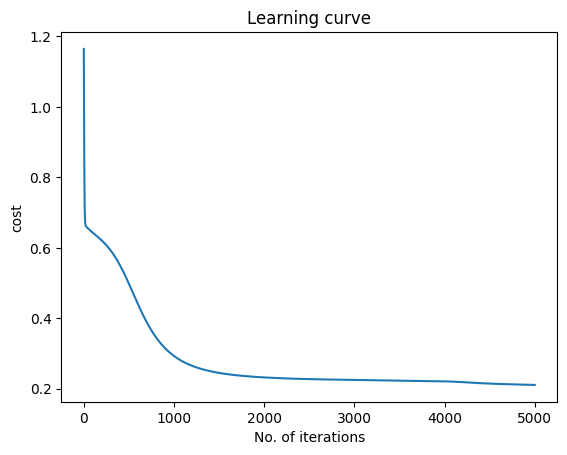

In [14]:
plt.plot(cost)
plt.xlabel("No. of iterations")
plt.ylabel("cost")
plt.title("Learning curve")

Predicting results:

In [28]:
def display_confusion_matrix(cm):
  sns.heatmap(cm, cmap = "Greens", annot = True, cbar_kws={"label":"color bar"},
              xticklabels = ["Approved", "Rejected"], yticklabels = ["Approved","Rejected"])
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title("confusion Matrix")


              precision    recall  f1-score   support

           0       0.91      0.90      0.91       404
           1       0.94      0.95      0.95       664

    accuracy                           0.93      1068
   macro avg       0.93      0.93      0.93      1068
weighted avg       0.93      0.93      0.93      1068





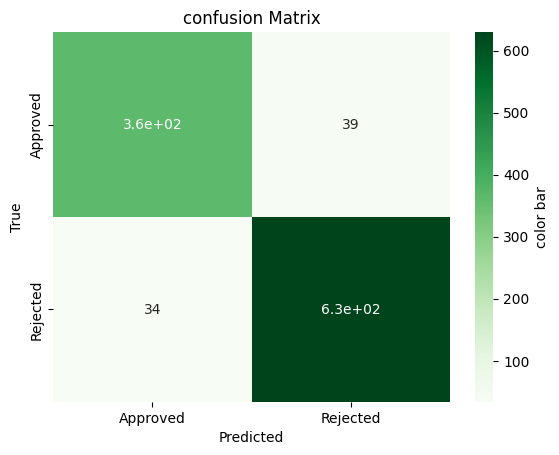

In [29]:
y_predict = log_reg_mod.predict(x_test)[0]
cm = confusion_matrix(y_test[0],y_predict)
print(classification_report(y_test[0],y_predict))
print("\n")
display_confusion_matrix(cm)